# Equation de Schrödinger libre par la FFT

Faire un programme en C++ qui intègre l'équation de Schrödinger "libre" (sans potentiel) en une dimension:
\begin{equation}
i\frac{\partial\psi}{\partial t}(x,t)=-\frac 12\frac{\partial ^2\psi}{\partial x ^2}(x,t)
\end{equation}
avec comme condition initiale (choisir $a,b$ librement: $0<a<b<L$):
$$
\psi(x,0)= \begin{cases}
\frac{4(x-a)(b-x)}{(b-a)^2}&\mathrm{si}~a<x<b,\\
0&\mathrm{sinon}.
\end{cases}
$$

En transformant (1) par FFT on obtient l'équation différentielle ordinaire
$$
\frac{\partial\widehat\psi_n}{\partial t}(t)=-2i(\pi k_n)^2\widehat\psi_n(t).
$$
La fonction $\psi$ dans l'espace direct est représentée par le vecteur $\{\psi(x_0),\dots,\psi(x_{N-1})\}$ et sa transformée de Fourier dans l'espace des fréquences par le vecteur $\{\widehat\psi(k_0),\dots,\widehat\psi(k_{N-1})\}$ où:
$$
x_n=\frac{nL}N,\qquad
k_n=\begin{cases}
\frac nL&\mathrm{si}~0\le n\le\frac N2\\
-\frac {N-n}L&\mathrm{si}~\frac N2< n< N
\end{cases}~.
$$

Choisir $N$, $L$, $T$, $\delta t$:

 * $N$ un produit des facteurs premiers $2,3,5,7$: par ex. $210, 1470, 6300,\dots$.
 * $L\approx 10$
 * intégrer pour $t=0,\dots,T\approx 5$, afficher la solution tous les $\delta t\approx 0.1$

Le programme doit:

 * définir la condition initiale et la transformer par [FFTw](https://www.fftw.org/) 
 * intégrer l'équation pour $\widehat \psi$ par la méthode **DOPRI5** de la [librairie BOOST](https://www.boost.org/doc/libs/1_86_0/libs/numeric/odeint/doc/html/boost_numeric_odeint/getting_started/overview.html) (voir [Série 5](https://moodle.unige.ch/mod/folder/view.php?id=944679))
 * sauver la solution (après une transformation FFT inverse) dans un fichier output.txt formaté ainsi:

$$
\begin{matrix}
t_0 & \mathrm{Re}\psi(x_0,t_0)&\dots&\mathrm{Re}\psi(x_{N-1},t_0)&\mathrm{Im}\psi(x_0,t_0)&\dots&\mathrm{Im}\psi(x_{N-1},t_0)\\
t_1 & \mathrm{Re}\psi(x_0,t_1)&\dots&\mathrm{Re}\psi(x_{N-1},t_1)&\mathrm{Im}\psi(x_0,t_1)&\dots&\mathrm{Im}\psi(x_{N-1},t_1)\\
&&\vdots&&&\vdots &
\end{matrix}
$$

Dessiner ci-dessous la solution

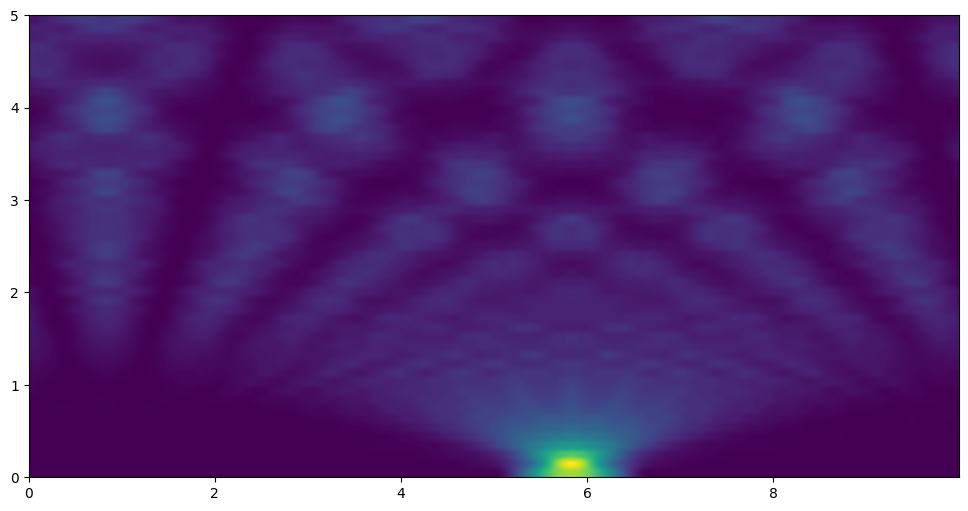

In [1]:
import numpy as np
from numpy import fft as ft
import matplotlib.pyplot as plt

psi = np.loadtxt("output.txt")
pars = dict((x[0], float(x[1])) for x in np.loadtxt("params.txt", dtype=str))
N = int(pars['Size'])
L = int(pars['Length'])
x = np.arange(N)*L/N
time = psi[:,0]
psi = psi[:,1:(N+1)]+1j*psi[:,N+1:(2*N+1)]
fig,ax = plt.subplots(figsize=(12,6))
ax.imshow(np.absolute(psi)**2, aspect='auto', extent=[x[0], x[-1], time[0], time[-1]], origin='lower')
plt.show()

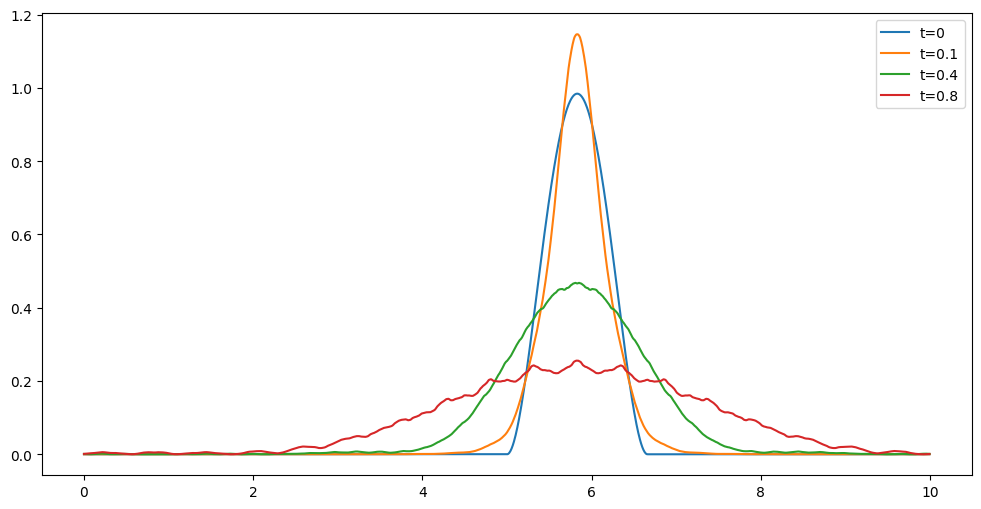

In [2]:
fig,ax = plt.subplots(figsize=(12,6))
for t in [0, .1, .4, .8]:
    ax.plot(x, np.absolute(psi[np.where(time == t)[0][0],:])**2, label=f"t={t}")
ax.legend()
plt.show()